# One Dimensional Lattice Models with QuTiP: Introduction

Saumya Biswas (saumyab@uoregon.edu)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

We introduce the basic functionality of QuTiPs Lattice1d class of the lattice module.

# About

The qutip.lattice module enables defining tight binding/lattice models for bosons and fermions on lattices and calculating their fundamental properties specially features arising from the translational symmetry of the lattice. The lattice classes defined are compatible with the rest of the functionalities of QuTiP and can make use of them quite conveniently.

The module can be used to perform the widely used quantum optics calculations involving unitary/nonunitary evolutions, steadystates, correlation functions for bosons and fermions on a lattice. It also facilitates the traditional condensed matter problem calculations about topology and ground state properties.

The lattice1d class is well-suited for studying composite systems with multiple orbitals/excitations/spins per site of a crystal(with a unit cell possibly composed of multiple sites) with tensor structures of indices(cell number, site number, degrees of freedom) aligned with the spirit of QuTiP's tensor functionalities.

## Single-particle and Multiparticle physics

All the functionalities of the Lattice1d class are for sigle particle physics. The multi-particle physics calculations can be performed with a subclass of the Lattice1d class which is initiated with an instance of the Lattice1d class and inherits all the information about the lattice and basis.

![title](images/latt_1.png)

## Unitcell structure in the Second Quantized notation
Defining an instance of the Lattice1d class requires formatting the second Quantized Hamiltonian in a unitcell based structure with nearest neighbor coupling only. Howewver, the functionality is limited to single particle physics only in Lattice1d class methods.

\begin{eqnarray}
H = \sum_i \psi_i^{\dagger} D \psi_i + \sum_{i} \left( \psi_i^{\dagger} T \psi_{i+1} +  \psi_{i+1}^{\dagger} T^{\dagger} \psi_i  \right) \label{eq:TB_block} 
\end{eqnarray}

where $\psi_i$ is the annihilation operator for a unit cell at coordinate i,$D$ is the cell Hamiltonian of the unit cell, $T$ is the inter cell hopping. Any 1d lattice can be put in the form of the equation above by resolving it into unit cells with coupling limited to the nearest neighbors only.

The Lattice1d class is based on this unit cell and nearest neighbor hopping format. A unit cell can be comprised of one or more sites with one or more orbitals, spins, excitations or any other degrees of freedom. An 1d lattice with next nearest neighbor coupling can be equivalently represented as a 1d lattice with unit cells of larger size limiting the hopping terms to nearest neighbors only.

## How to Define a One Dimensional Lattice

In [153]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np

### Declaring a tight binding chain with a single site unit cell
As a default the instance of Lattice1d class is initialized as an atomic chain with a unit
cell with one atom only. The user need only define the number of cells and the boundary
condition.

In [154]:
boundary_condition = "periodic"
cells = 3
Periodic_Atom_Chain = Lattice1d(num_cell=cells, boundary = boundary_condition)

The user can call Periodic_Atom_Chain to print all its information.

In [155]:
Periodic_Atom_Chain

Lattice1d object: Number of cells = 3,
Number of sites in the cell = 1,
Degrees of freedom per site = [],
Lattice tensor configuration = [3],
basis_Hamiltonian = Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]],
inter_hop = [Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-1.]]],
cell_tensor_config = [1]
Boundary Condition:  Periodic

To define a lattice with more than one site per unit cell and one or more degrees of freedom per site, the cell_num_site and cell_site_dof arguments must be used. In a case like this, specifying the intra and inter cell interactions would also be necessary (through the arguments cell_Hamiltonian and inter_hop) in most cases. However, Lattice1d() will initiate the instance with default cell_Hamiltonian and inter_hop
if the user does not input it.

### The use of display_unit_cell() and display_lattice()

The functions display_unit_cell() and display_lattice() can be used at any stage to produce visual symbolizations and elementwise information. 

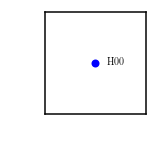

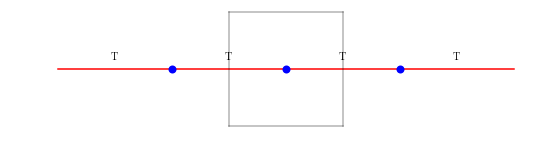

In [156]:
H = Periodic_Atom_Chain.display_unit_cell(label_on = True)
T = Periodic_Atom_Chain.display_lattice()

The user can review the attribute values of H and T from the retuned Qobjs.

In [157]:
print(H[0][0])
print(T)

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]
Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-1.]]


### Multiple site per unitcell and multiple degrees of freedom per site 

Specifying cell_num_site enables choosing multiple sites for a unit call and any combination of degrees of freedom can be chosen for each site with cell_site_dof.

In [7]:
boundary_condition = "periodic"
cells = 3
cell_num_site = 2
cell_site_dof = [2,3]    # It could be 2 orbitals and 3 spins per sites or
                         # any other combination of such degrees of freedom
lattice_3223 = Lattice1d(num_cell=cells, boundary = boundary_condition,
                           cell_num_site = cell_num_site, cell_site_dof = cell_site_dof)

###  The use of cell_structures() 

There is an aide function that help the user form the cell_Hamiltonian and inter_hop
arguments namely cell_structures().

In [8]:
val_s = ['site0', 'site1', 'site2']
val_t = [' orb0', ' orb1']
(cell_H_form,inter_cell_T_form,cell_H,inter_cell_T) = cell_structures( val_s, val_t)

The cell_structure() function returns two list of lists cell_H_form and inter_cell_T_form
that prints str s that can guide the user enter the nonzero elements at cell_H 
and inter_cell_T which are np.zeros with the appropriate size. The procedure would
be to check a certain element in cell_H_form and insert the value for cell_H and so on.

In [9]:
cell_H_form[0][5]

'<site0 orb0 H site2 orb1>'

In [10]:
cell_H[0][5] = -1-0.5j   # Calculated value from hand calculation
cell_H[5][0] = -1+0.5j   # keeping it Hermitian

Similarly, we set more elements to non-zero values.

In [11]:
cell_H_form[2][5]

'<site1 orb0 H site2 orb1>'

In [12]:
cell_H[2][5] = -1+0.25j   # Calculated value from hand calculation
cell_H[5][2] = -1-0.25j   # keeping it Hermitian

The user would have to enter all the nonzero elements in cell_H and inter_cell_T
and then convert them into Qobjs and use them in declaring the instance of Lattice_1d.

In [13]:
inter_cell_T_form[5][0]

'<cell(i):site2 orb1 H site0 orb0:cell(i+1) >'

In [14]:
inter_cell_T[5][0] = -0.5
inter_cell_T[0][5] = -0.5

In [15]:
cell_H = Qobj(cell_H)
inter_cell_T = Qobj(inter_cell_T)
lattice_324 = Lattice1d(num_cell=3, boundary = "periodic", cell_num_site = 3, cell_site_dof = [2], cell_Hamiltonian = cell_H, inter_hop = inter_cell_T )

cell_cite_dof can take care of composite degrees of freedom such as orbits, spins and/or excitations. For example, if each site has 4 orbitals and 2 spins, we set cell_site_dof = [4,2] defines that lattice. With the aid of the Lattice1d.basis() operator we can access particles localized at specific cell,site,orbitals and spin.
Valid inputs for cell_site_dof are one int(e.g. 4) or a list of int's(e.g. [4,2]). A single dof can be entered either as an int or a list with that int. So cell_site_dof = [4] and cell_site_dof = 4 are the same. 

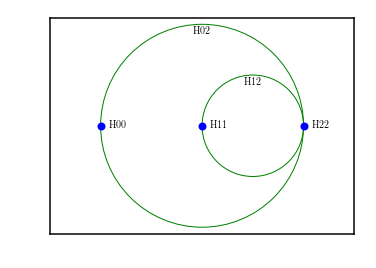

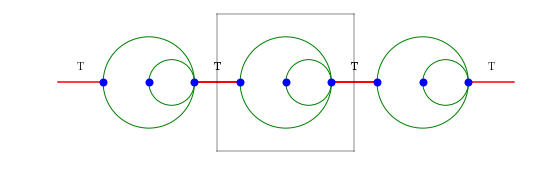

In [16]:
H = lattice_324.display_unit_cell(label_on = True)
T = lattice_324.display_lattice()

The labels of the diagrams can be read off from the returned H and T Qobjs. For example, $H_{12}$ can be read off as follows.

In [17]:
H[1][2]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.+0.j   -1.+0.25j]
 [ 0.+0.j    0.+0.j  ]]

### Basis function: ket vector initialized at specific cell, site, dof:

The basis() function enables the user to initialize a ket vector at a specific cell,
site and dof.

In [18]:
lattice_3224 = Lattice1d(num_cell=3, boundary = "periodic", \
                           cell_num_site = 2, cell_site_dof = [4,2])
psi0 = lattice_3224.basis(1,0,[2,1])
print( psi0.dag() )  # Because plotting the dag() takes up less space

Quantum object: dims = [[1, 1, 1, 1], [3, 2, 4, 2]], shape = (1, 48), type = bra
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Position Operator

Calling the position operator, x() returns an operator in matrix form that gives the
cell number for all the dofs present on the diagonal elements. The length of the unit
cell is always considered 1.

In [19]:
lattice_412 = Lattice1d(num_cell=4, boundary = "periodic", cell_num_site = 1, cell_site_dof = [2])
lattice_412.x()

Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3.]]

### The crystal momentum operator

The crystal momentum operator can be produced with the k() method.

In [20]:
lattice_411 = Lattice1d(num_cell=4, boundary = "periodic", cell_num_site = 1, cell_site_dof = [1])
k = lattice_411.k()
print(k)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.78539816+0.j         -0.78539816-0.78539816j  0.78539816+0.j
  -0.78539816+0.78539816j]
 [-0.78539816+0.78539816j  0.78539816+0.j         -0.78539816-0.78539816j
   0.78539816+0.j        ]
 [ 0.78539816+0.j         -0.78539816+0.78539816j  0.78539816+0.j
  -0.78539816-0.78539816j]
 [-0.78539816-0.78539816j  0.78539816+0.j         -0.78539816+0.78539816j
   0.78539816+0.j        ]]


### Distribute A Operator
The operator_at_cells() function distributes a user input operator on cells specified 
in a list and identity operator on the rest.
The operator distribute_operator() distributes it over all the cells indiscriinately.

In [21]:
lattice_412 = Lattice1d(num_cell=4, boundary = "periodic", cell_num_site = 1, cell_site_dof = [2])
op = Qobj(np.array([[0,1],[1,0]]) )
op_sp = lattice_412.operator_at_cells(op, cells = [1,2])
op_all = lattice_412.distribute_operator(op)
print(op_sp)
print(op_all)

Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
Quantum object: dims = [[4, 2], [4, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


### Hamiltonian:
The Hamiltoian() function returns the Hamiltonian for the lattice.


In [22]:
boundary_condition = "periodic"
cells = 8
Periodic_Atom_Chain = Lattice1d(num_cell=cells, boundary = boundary_condition)
Hamt = Periodic_Atom_Chain.Hamiltonian()
print(Hamt)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0. -1.  0.  0.  0.  0.  0. -1.]
 [-1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.]
 [-1.  0.  0.  0.  0.  0. -1.  0.]]


### Dispersion Relation:
plot_dispersion() plots the valid (same as the number of unit cells) points in k-space
over the dispersion relation of an infinite crystal.

get_dispersion() returns the tuple of two np.ndarrays (knxA,val_kns). knxA has the valid k-values in it and val_kns has the band energies at those k-values. The length of 
the unit cell is always set to 1.

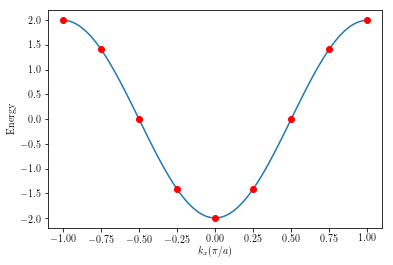

[[-3.14159265]
 [-2.35619449]
 [-1.57079633]
 [-0.78539816]
 [ 0.        ]
 [ 0.78539816]
 [ 1.57079633]
 [ 2.35619449]]
[[ 2.          1.41421356  0.         -1.41421356 -2.         -1.41421356
   0.          1.41421356]]


In [23]:
Periodic_Atom_Chain.plot_dispersion()
[knxA,val_kns] = Periodic_Atom_Chain.get_dispersion()
print(knxA)
print(val_kns)

## Unitary evolution a Gaussian Wavepacket with mesolve

### With no initial momentum

In [24]:
num_cellN = 51
discrete_space_periodic = Lattice1d(num_cell=num_cellN, boundary = "periodic", cell_num_site = 1,
                                    cell_site_dof = [1])
H0 = discrete_space_periodic.Hamiltonian()
xs = np.linspace(0, num_cellN-1, num_cellN)

In [25]:
sig = 3     # A standard deviation of 3
xm = num_cellN //2 + 15
psi0 = 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(xs-xm)**2/2/sig/sig)
psi0 = Qobj(np.sqrt(psi0))

In [26]:
tlist = np.linspace(0,24,801)
options = Options(atol=1e-12)
options.store_states = True
states_Gauss_0 = mesolve(H0, psi0, tlist, [], [], options=options)

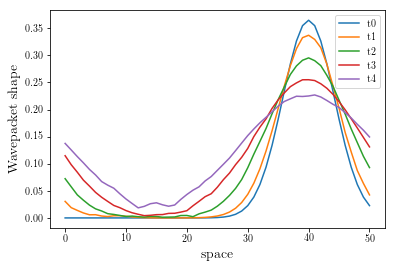

In [27]:
t0 = 0
t1 = 180
t2 = 360
t3 = 540
t4 = 720
x_t0 = states_Gauss_0.states[t0]
x_t1 = states_Gauss_0.states[t1]
x_t2 = states_Gauss_0.states[t2]
x_t3 = states_Gauss_0.states[t3]
x_t4 = states_Gauss_0.states[t4]

plt.plot(xs, np.abs(x_t0))
plt.plot(xs, np.abs(x_t1))
plt.plot(xs, np.abs(x_t2))
plt.plot(xs, np.abs(x_t3))
plt.plot(xs, np.abs(x_t4))
plt.xlabel('space', fontsize=14)
plt.ylabel('Wavepacket shape', fontsize=14)
plt.legend(['t0', 't1', 't2', 't3', 't4'])
plt.show()
plt.close()

The wavepacket disperses over time keeping the periodic nature in space, since we picked a periodic boundary cndition for space.

### With initial momentum

We initialize a Gaussian state with initial crystal momentum $\pi/3$ and plot the momentum expectation value with the unitary Schrodinger evolution.

In [28]:
sig = 3
xm = num_cellN //2 + 15
psi0 = 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(xs-xm)**2/2/sig/sig)
psi0 = Qobj(np.sqrt(psi0) * np.exp(np.pi*1j*xs/3) )

In [29]:
k = discrete_space_periodic.k()
tlist = np.linspace(0,24,801)
options = Options(atol=1e-12)
options.store_states = True
states_Gauss_k = mesolve(H0, psi0, tlist, [], [k], options=options)

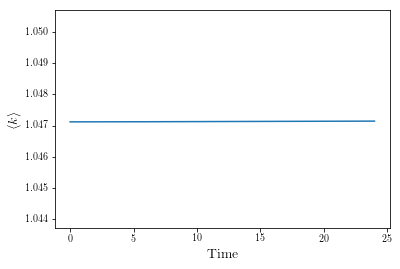

In [30]:
plt.plot(tlist, states_Gauss_k.expect[0])
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\langle k \rangle$', fontsize=14)
plt.ylim([np.pi/3.01, np.pi/2.99])
plt.show()
plt.close()

In [31]:
np.pi/3

1.0471975511965976

The crystal momentum operator commutes with the Hamiltonian, so it is conserved in a Hamiltonian evolution, as expected.

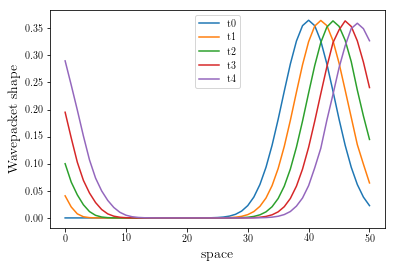

In [32]:
t0 = 0
t1 = 40
t2 = 80
t3 = 120
t4 = 160
x_t0 = states_Gauss_k.states[t0]
x_t1 = states_Gauss_k.states[t1]
x_t2 = states_Gauss_k.states[t2]
x_t3 = states_Gauss_k.states[t3]
x_t4 = states_Gauss_k.states[t4]

plt.plot(xs, np.abs(x_t0))
plt.plot(xs, np.abs(x_t1))
plt.plot(xs, np.abs(x_t2))
plt.plot(xs, np.abs(x_t3))
plt.plot(xs, np.abs(x_t4))
plt.xlabel('space', fontsize=14)
plt.ylabel('Wavepacket shape', fontsize=14)
plt.legend(['t0', 't1', 't2', 't3', 't4'])
plt.show()
plt.close()

Due to the initial momentum, the wave-packet moves to the right keeping the momentum as well as disperses.

### Simulating a hardwall

We can simulate a hardwall by putting in a large potential on the first and last site of the lattice as well as change the boundary condition to "aperiodic".

In [33]:
sig = 3
xm = num_cellN //2 + 5
psi0 = 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(xs-xm)**2/2/sig/sig)
psi0 = Qobj(np.sqrt(psi0) * np.exp(np.pi*1j*xs/3) )

In [34]:
discrete_space_aperiodic = Lattice1d(num_cell=num_cellN, boundary = "aperiodic",
                                     cell_num_site = 1, cell_site_dof = [1])

psiL = discrete_space_aperiodic.basis(0,0,[0])
psiR = discrete_space_aperiodic.basis(num_cellN-1,0,[0])
Ha = discrete_space_aperiodic.Hamiltonian()
H_p = 1e4*(psiL * psiL.dag() + psiR * psiR.dag() )
tlist = np.linspace(0,30,5001)
options = Options(atol=1e-12)
options.store_states = True
states_Gauss_k_HW = mesolve(Ha+H_p, psi0, tlist, [], [k], options=options)
# Warning:  This calculation takes upto a minute

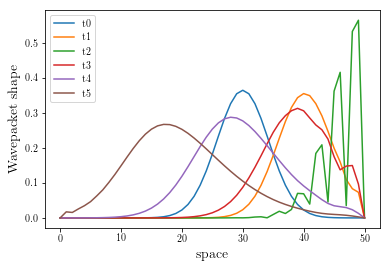

In [35]:
t0 = 0
t1 = 1000
t2 = 2000
t3 = 3000
t4 = 4000
t5 = 5000
x_t0 = states_Gauss_k_HW.states[t0]
x_t1 = states_Gauss_k_HW.states[t1]
x_t2 = states_Gauss_k_HW.states[t2]
x_t3 = states_Gauss_k_HW.states[t3]
x_t4 = states_Gauss_k_HW.states[t4]
x_t5 = states_Gauss_k_HW.states[t5]

plt.plot(xs, np.abs(x_t0))
plt.plot(xs, np.abs(x_t1))
plt.plot(xs, np.abs(x_t2))
plt.plot(xs, np.abs(x_t3))
plt.plot(xs, np.abs(x_t4))
plt.plot(xs, np.abs(x_t5))
plt.xlabel('space', fontsize=14)
plt.ylabel('Wavepacket shape', fontsize=14)
plt.legend(['t0', 't1', 't2', 't3', 't4', 't5'])
plt.show()
plt.close()

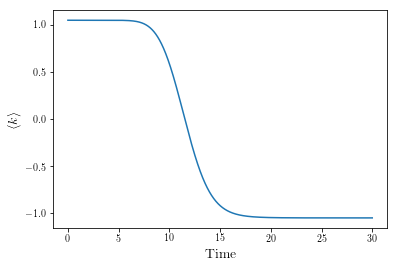

In [36]:
plt.plot(tlist, states_Gauss_k_HW.expect[0])
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\langle k \rangle$', fontsize=14)
plt.show()
plt.close()

In [37]:
kd = discrete_space_aperiodic.k()
psi_f = states_Gauss_k_HW.states[3200]
kex0 = psi0.dag() * kd * psi0
kexf = psi_f.dag() * kd * psi_f
print('Initital momentum: ', kex0)
print('Final momentum: ', kexf)

Initital momentum:  Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[1.04719755]]
Final momentum:  Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[-1.04114054]]


We confirm that, the final momentum is indeed exactly the opposite of the initial momentum.

### Dissipation induced translational motion 

We can initialize a Gaussian state with no initial momentum and devise a dissipation induced translational motion scheme with forming a collapse operator that translates the wavepacket by one lattice point periodically.

In [69]:
num_cellN = 51
discrete_space_periodic = Lattice1d(num_cell=num_cellN, boundary = "periodic", cell_num_site = 1,
                                    cell_site_dof = [1])
H0 = discrete_space_periodic.Hamiltonian()
xp = discrete_space_periodic.x()
kp = discrete_space_periodic.k()
xs = np.linspace(0, num_cellN-1, num_cellN)

In [70]:
sig = 3     # A standard deviation of 3
xm = num_cellN //2
psi0 = 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(xs-xm)**2/2/sig/sig)
psi0 = Qobj(np.sqrt(psi0))

In [71]:
lat_trR = np.diag(np.zeros(num_cellN-1)+1, -1)
lat_trR[0, num_cellN-1] = 1    # translate right
lat_trL = np.diag(np.zeros(num_cellN-1)+1, 1)
lat_trL[num_cellN-1, 0] = 1     #  translate left
trR = Qobj(lat_trR)
trL = Qobj(lat_trL)

In [72]:
gamma = 2
col_op = [np.sqrt(gamma) * trR ]

In [73]:
tlistC = np.linspace(0,24,801)
options = Options(atol=1e-12)
options.store_states = True
rho0 = psi0 * psi0.dag()
states_Gauss_0 = mesolve(H0, rho0, tlistC, col_op, [kp], options=options)

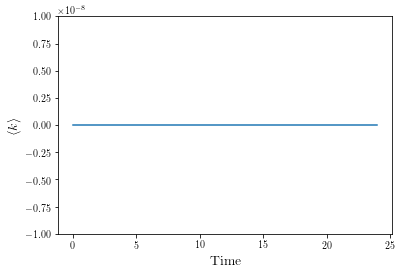

In [74]:
plt.plot(tlistC, states_Gauss_0.expect[0])
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\langle k \rangle$', fontsize=14)
plt.ylim([-1e-8, 1e-8])
plt.show()
plt.close()

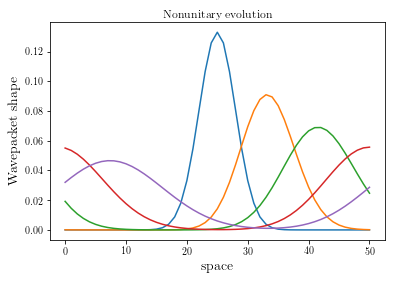

In [75]:
t0 = 0
t1 = 140
t2 = 280
t3 = 420
t4 = 560

diag_x0 = np.diag(states_Gauss_0.states[t0])
diag_x1 = np.diag(states_Gauss_0.states[t1])
diag_x2 = np.diag(states_Gauss_0.states[t2])
diag_x3 = np.diag(states_Gauss_0.states[t3])
diag_x4 = np.diag(states_Gauss_0.states[t4])

plt.plot(xs, np.abs(diag_x0))
plt.plot(xs, np.abs(diag_x1))
plt.plot(xs, np.abs(diag_x2))
plt.plot(xs, np.abs(diag_x3))
plt.plot(xs, np.abs(diag_x4))
plt.xlabel('space', fontsize=14)
plt.ylabel('Wavepacket shape', fontsize=14)
plt.title('Nonunitary evolution')
plt.show()
plt.close()

The wave-packet disperses and trannslates to the right, but the momentum expectation remains zero, since the translation is induced by the dissipation.

# Example: A Coupled Resonator Optical Waveguide¶

We now demonstrate the basic functionality of QuTiPs Lattice1d class of the lattice module with the example of a Coupled Resonator Optical Waveguide(CROW)(ref. [2]).

![title](images/CROW.png)

\begin{eqnarray}
H_0 = \sum\limits_{n} \left(H_a + H_b + H_{ab} + H^{\dagger}_{ab}   \right) \\
H_a = \frac{J}{2} a_n^{\dagger} \left( e^{-i\eta} a_{n-1} + e^{i\eta} a_{n+1} \right) \\
H_b = \frac{J}{2} b_n^{\dagger} \left( e^{i\eta} b_{n-1} + e^{-i\eta} b_{n+1} \right) \\
H_{ab} = J a_n^{\dagger} \left( sin (\eta) b_n + \frac{1}{2} \left(b_{n-1} + b_{n+1}  \right)  \right)
\end{eqnarray}

For implementation with Lattice1d class, we resolve the Hamiltonian into unitcells.
\begin{equation}
H = \sum\limits_{n} H_n
\end{equation}

\begin{eqnarray}
H_{n}= \begin{bmatrix}
    a_{n}^{\dagger} & b_{n}^{\dagger}       
\end{bmatrix} 
\begin{bmatrix}
      o     & J sin(\eta) \\
    J sin(\eta)    & 0 
\end{bmatrix}
\begin{bmatrix}
    a_{n}  \\
    b_{n}  
\end{bmatrix} 
\ \ \ \ \ \ \ \ \ \ \\
+ \left( \begin{bmatrix}
    a_{n}^{\dagger} & b_{n}^{\dagger}       
\end{bmatrix} 
\begin{bmatrix}
      e^{i\eta}     & 1 \\
    1    & e^{-i\eta} 
\end{bmatrix}
\begin{bmatrix}
    a_{n+1}  \\
    b_{n+1}  
\end{bmatrix} + H.C. \right)
\end{eqnarray}

In the present case, we have 1 site in every unit cell and 2 dofs per site. And

\begin{equation}
\text{cell_Hamiltonian} = \begin{bmatrix}
      o     & J sin(\eta) \\
    J sin(\eta)    & 0 
\end{bmatrix}
\end{equation}
\begin{equation}
\text{inter_hop} = \begin{bmatrix}
      e^{i\eta}     & 1 \\
    1    & e^{-i\eta} 
\end{bmatrix}
\end{equation}

In [80]:
cells = 4
cell_num_site = 1
cell_site_dof = [2]
J = 2

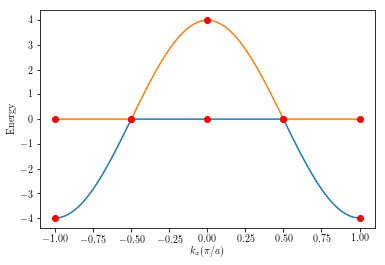

In [81]:
### For eta = 0
eta = 0
cell_H = Qobj(np.array([[0, J * np.sin(eta)], [J * np.sin(eta), 0]]))
inter_cell_T = (J/2) * Qobj(np.array([[np.exp(eta * 1j), 1], [1, np.exp(-eta*1j)]]))
CROW_lattice = Lattice1d(num_cell=cells, boundary = "periodic", cell_num_site = 1,
                         cell_site_dof = [2], cell_Hamiltonian = cell_H,
                         inter_hop = inter_cell_T )
CROW_lattice.plot_dispersion()

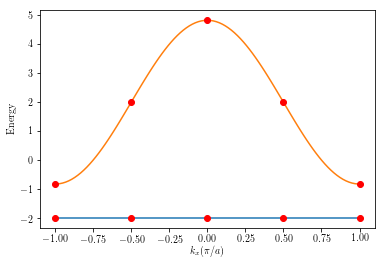

In [82]:
### For eta = pi/4
eta = np.pi/4
cell_H = Qobj(np.array([[0, J * np.sin(eta)], [J * np.sin(eta), 0]]))
inter_cell_T = (J/2) * Qobj(np.array([[np.exp(eta * 1j), 1], [1, np.exp(-eta*1j)]]))
CROW_lattice = Lattice1d(num_cell=cells, boundary = "periodic", cell_num_site = 1,
                         cell_site_dof = [2], cell_Hamiltonian = cell_H,
                         inter_hop = inter_cell_T )
CROW_lattice.plot_dispersion()

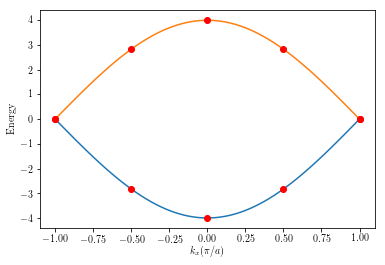

In [83]:
### For eta = pi/2
eta = np.pi/2
cell_H = Qobj(np.array([[0, J * np.sin(eta)], [J * np.sin(eta), 0]]))
inter_cell_T = (J/2) * Qobj(np.array([[np.exp(eta * 1j), 1], [1, np.exp(-eta*1j)]]))
CROW_lattice = Lattice1d(num_cell=cells, boundary = "periodic", cell_num_site = 1,
                         cell_site_dof = [2], cell_Hamiltonian = cell_H,
                         inter_hop = inter_cell_T )
CROW_lattice.plot_dispersion()

The three dispersion relationships for the three values of $\eta$ can be compared with the published results in Ref [2].

## Unitary dynamics example

### No initial momentum

In [101]:
cells = 100
nx = 2
ne = 1
positions = np.kron(range(nx), [1/nx for i in range(ne)])
S = np.kron(np.ones(cells), positions)
R = np.kron(range(0, cells), np.ones(nx*ne))
xA = R+S

In [102]:
eta = np.pi/2
cell_H = Qobj(np.array([[0, J * np.sin(eta)], [J * np.sin(eta), 0]]))
inter_cell_T = (J/2) * Qobj(np.array([[np.exp(eta * 1j), 1], [1, np.exp(-eta*1j)]]))
CROW_lattice = Lattice1d(num_cell=cells, boundary = "periodic", cell_num_site = 2,
                         cell_site_dof = [1], cell_Hamiltonian = cell_H,
                         inter_hop = inter_cell_T)

In [103]:
HCROW = CROW_lattice.Hamiltonian()
kC = CROW_lattice.k()

In [104]:
sig = 3    # standard deviation of the Gaussian Wavepacket
xm = cells //2 + 15
psi0 = 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(xA-xm)**2/2/sig/sig)
psi0 = Qobj(np.sqrt(psi0))
tlistW = np.linspace(0,30,5001)
options = Options(atol=1e-12)
options.store_states = True
states_CROW_u = mesolve(HCROW, psi0, tlistW, [], [kC], options=options)

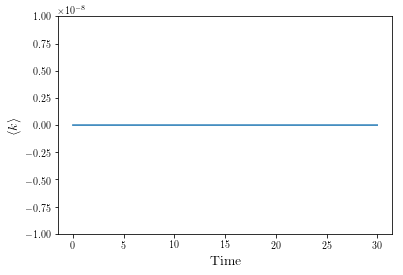

In [105]:
plt.plot(tlistW, states_CROW_u.expect[0])
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\langle k \rangle$', fontsize=14)
plt.ylim([-1e-8, 1e-8])
plt.show()
plt.close()

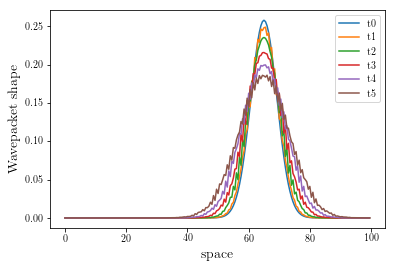

In [106]:
t0 = 0
t1 = 1000
t2 = 2000
t3 = 3000
t4 = 4000
t5 = 5000
x_t0 = states_CROW_u.states[t0]
x_t1 = states_CROW_u.states[t1]
x_t2 = states_CROW_u.states[t2]
x_t3 = states_CROW_u.states[t3]
x_t4 = states_CROW_u.states[t4]
x_t5 = states_CROW_u.states[t5]

plt.plot(xA, np.abs(x_t0))
plt.plot(xA, np.abs(x_t1))
plt.plot(xA, np.abs(x_t2))
plt.plot(xA, np.abs(x_t3))
plt.plot(xA, np.abs(x_t4))
plt.plot(xA, np.abs(x_t5))
plt.xlabel('space', fontsize=14)
plt.ylabel('Wavepacket shape', fontsize=14)
plt.legend(['t0', 't1', 't2', 't3', 't4', 't5'])
plt.show()
plt.close()

### With Initial momentum

In [113]:
sig = 3
xm = cells //2 + 15
psi0 = 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(xA-xm)**2/2/sig/sig)
psi0 = Qobj(np.sqrt(psi0) * np.exp(1*np.pi*1j*xA/3) )
tlistCk = np.linspace(0,30,5001)
options = Options(atol=1e-12)
options.store_states = True
states_CROW_uk = mesolve(HCROW, psi0, tlist, [], [kC], options=options)

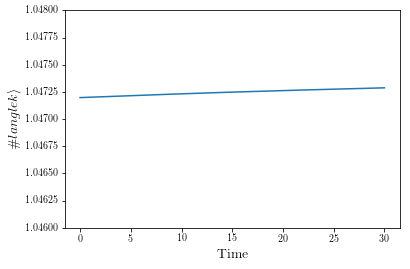

In [132]:
plt.plot(tlistCk, states_CROW_uk.expect[0])
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\#langle k \rangle$', fontsize=14)
plt.ylim([1.046, 1.048])
plt.show()
plt.close()

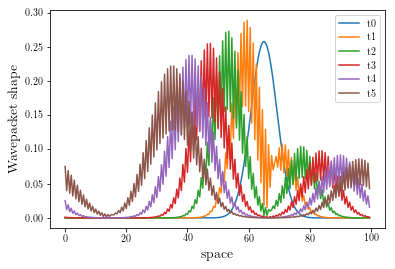

In [115]:
t0 = 0
t1 = 1000
t2 = 2000
t3 = 3000
t4 = 4000
t5 = 5000
x_t0 = states_CROW_u.states[t0]
x_t1 = states_CROW_u.states[t1]
x_t2 = states_CROW_u.states[t2]
x_t3 = states_CROW_u.states[t3]
x_t4 = states_CROW_u.states[t4]
x_t5 = states_CROW_u.states[t5]

plt.plot(xA, np.abs(x_t0))
plt.plot(xA, np.abs(x_t1))
plt.plot(xA, np.abs(x_t2))
plt.plot(xA, np.abs(x_t3))
plt.plot(xA, np.abs(x_t4))
plt.plot(xA, np.abs(x_t5))
plt.xlabel('space', fontsize=14)
plt.ylabel('Wavepacket shape', fontsize=14)
plt.legend(['t0', 't1', 't2', 't3', 't4', 't5'])
plt.show()
plt.close()

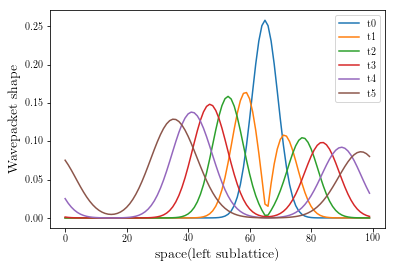

In [123]:
t0 = 0
t1 = 1000
t2 = 2000
t3 = 3000
t4 = 4000
t5 = 5000
x_t0 = states_CROW_u.states[t0]
x_t1 = states_CROW_u.states[t1]
x_t2 = states_CROW_u.states[t2]
x_t3 = states_CROW_u.states[t3]
x_t4 = states_CROW_u.states[t4]
x_t5 = states_CROW_u.states[t5]

plt.plot(xA[range(0,200,2)], np.abs(x_t0.full()[range(0,200,2)]))
plt.plot(xA[range(0,200,2)], np.abs(x_t1.full()[range(0,200,2)]))
plt.plot(xA[range(0,200,2)], np.abs(x_t2.full()[range(0,200,2)]))
plt.plot(xA[range(0,200,2)], np.abs(x_t3.full()[range(0,200,2)]))
plt.plot(xA[range(0,200,2)], np.abs(x_t4.full()[range(0,200,2)]))
plt.plot(xA[range(0,200,2)], np.abs(x_t5.full()[range(0,200,2)]))
plt.xlabel('space(left sublattice)', fontsize=14)
plt.ylabel('Wavepacket shape', fontsize=14)
plt.legend(['t0', 't1', 't2', 't3', 't4', 't5'])
plt.show()
plt.close()

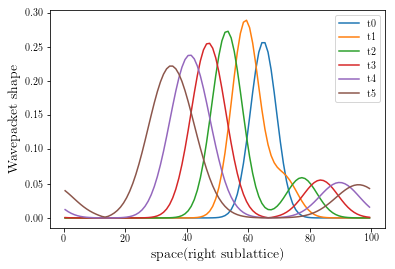

In [124]:
t0 = 0
t1 = 1000
t2 = 2000
t3 = 3000
t4 = 4000
t5 = 5000
x_t0 = states_CROW_u.states[t0]
x_t1 = states_CROW_u.states[t1]
x_t2 = states_CROW_u.states[t2]
x_t3 = states_CROW_u.states[t3]
x_t4 = states_CROW_u.states[t4]
x_t5 = states_CROW_u.states[t5]

plt.plot(xA[range(1,200,2)], np.abs(x_t0.full()[range(1,200,2)]))
plt.plot(xA[range(1,200,2)], np.abs(x_t1.full()[range(1,200,2)]))
plt.plot(xA[range(1,200,2)], np.abs(x_t2.full()[range(1,200,2)]))
plt.plot(xA[range(1,200,2)], np.abs(x_t3.full()[range(1,200,2)]))
plt.plot(xA[range(1,200,2)], np.abs(x_t4.full()[range(1,200,2)]))
plt.plot(xA[range(1,200,2)], np.abs(x_t5.full()[range(1,200,2)]))
plt.xlabel('space(right sublattice)', fontsize=14)
plt.ylabel('Wavepacket shape', fontsize=14)
plt.legend(['t0', 't1', 't2', 't3', 't4', 't5'])
plt.show()
plt.close()

## translation by dissipation

In [142]:
cells = 100
nx = 2
ne = 1
positions = np.kron(range(nx), [1/nx for i in range(ne)])
S = np.kron(np.ones(cells), positions)
R = np.kron(range(0, cells), np.ones(nx*ne))
xA = R+S

In [143]:
eta = np.pi/2
cell_H = Qobj(np.array([[0, J * np.sin(eta)], [J * np.sin(eta), 0]]))
inter_cell_T = (J/2) * Qobj(np.array([[np.exp(eta * 1j), 1], [1, np.exp(-eta*1j)]]))
CROW_lattice = Lattice1d(num_cell=cells, boundary = "periodic", cell_num_site = 2,
                         cell_site_dof = [1], cell_Hamiltonian = cell_H,
                         inter_hop = inter_cell_T)

In [144]:
HCROW = CROW_lattice.Hamiltonian()
kC = CROW_lattice.k()

In [145]:
lat_trR = np.diag(np.zeros(cells-1)+1, -1)
lat_trR[0, cells-1] = 1   # translate to the right

lat_trL = np.diag(np.zeros(cells-1)+1, 1)
lat_trL[cells-1, 0] = 1   # translate to the left

trR = Qobj(lat_trR)
trL = Qobj(lat_trL)

In [146]:
gamma = 0.5
col_op = [np.sqrt(gamma) * tensor(trL, qeye(2)) ]  # We could have used trR for translation to the right

In [147]:
sig = 3
xm = cells //2 + 15
psi0 = 1/np.sqrt(2*np.pi*sig**2) * np.exp(-(xA-xm)**2/2/sig/sig)
psi0 = Qobj(np.sqrt(psi0))
tlistCN = np.linspace(0,30,601)
options = Options(atol=1e-12)
options.store_states = True
states_CROW_nu = mesolve(HCROW, psi0, tlistCN, col_op, [kC], options=options)

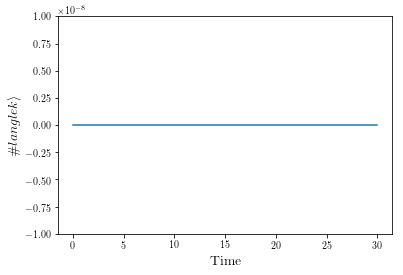

In [148]:
plt.plot(tlistCN, states_CROW_nu.expect[0])
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\#langle k \rangle$', fontsize=14)
plt.ylim([-1e-8, 1e-8])
plt.show()
plt.close()

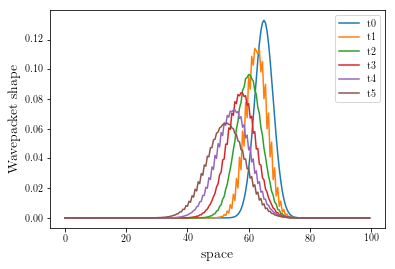

In [151]:
t0 = 0
t1 = 100
t2 = 200
t3 = 300
t4 = 400
t5 = 500
x_t0 = np.diag(states_CROW_nu.states[t0])
x_t1 = np.diag(states_CROW_nu.states[t1])
x_t2 = np.diag(states_CROW_nu.states[t2])
x_t3 = np.diag(states_CROW_nu.states[t3])
x_t4 = np.diag(states_CROW_nu.states[t4])
x_t5 = np.diag(states_CROW_nu.states[t5])

plt.plot(xA, np.abs(x_t0))
plt.plot(xA, np.abs(x_t1))
plt.plot(xA, np.abs(x_t2))
plt.plot(xA, np.abs(x_t3))
plt.plot(xA, np.abs(x_t4))
plt.plot(xA, np.abs(x_t5))
plt.xlabel('space', fontsize=14)
plt.ylabel('Wavepacket shape', fontsize=14)
plt.legend(['t0', 't1', 't2', 't3', 't4', 't5'])
plt.show()
plt.close()

### References
[1] J. R. Johansson, P. D. Nation, and F. Nori, Comp. Phys. Comm. 183, 1760 (2012). http://qutip.org 

[2] Han, JungYun, Clemens Gneiting, and Daniel Leykam. "Helical transport in coupled resonator waveguides." Physical Review B 99.22 (2019): 224201.
https://journals.aps.org/prb/abstract/10.1103/PhysRevB.99.224201#

In [121]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, and Eric Giguère.
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.5.0.dev0+c8074e5
Numpy Version:      1.15.2
Scipy Version:      1.1.0
Cython Version:     0.28.5
Matplotlib Version: 3.0.0
Python Version:     3.5.4
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/GSOC/Aug5/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


In [122]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
